# Loan Approval Analysis

The aim is to identify the customer segments to whom the loan can be granted. The main objective is to analyze and predict whether assigning the loan to a particular person will be safe or not based on specific features.

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Reading the dataset
loan_dataset = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [61]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Pre-Processing

**1. Checking for missing values**

In [62]:
loan_dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**2. Filling missing values**

In [63]:
loan_dataset['Gender'] = loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode().values[0])
loan_dataset['Married'] = loan_dataset['Married'].fillna(loan_dataset['Married'].mode().values[0])
loan_dataset['Dependents'] = loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode().values[0])
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode().values[0])
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode().values[0] )
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode().values[0] )

In [64]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


**3. Removing the Id column**

In [65]:
loan_dataset.drop('Loan_ID', axis=1, inplace=True)
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


#  Exploratory Data Analysis

In [66]:
loan_dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [67]:
loan_dataset.shape

(614, 12)

In [68]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [69]:
loan_dataset.duplicated().any()

False

**1. Gender obtaining maximum number of loans**

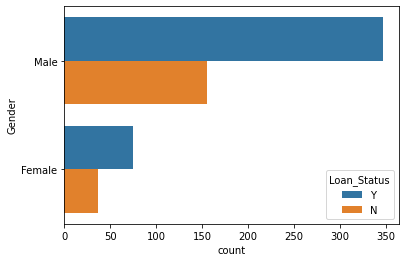

In [12]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = loan_dataset)

**Conclusion:** Males tends to get more loan than females.

**2. Effect of marital status**

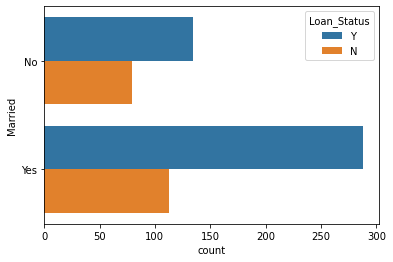

In [13]:
sns.countplot(y = 'Married', hue = 'Loan_Status', data = loan_dataset)

**Conclusion:** Married people tends to get more loan than unmarried people.

**3. Effect of education**

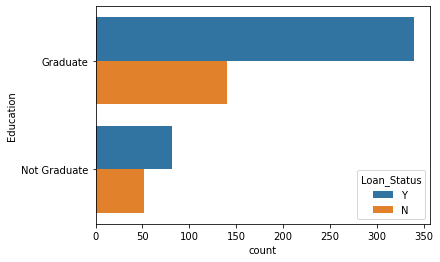

In [14]:
sns.countplot(y = 'Education', hue = 'Loan_Status', data = loan_dataset)

**Conclusion:** Graduated people tends to get loan more.

**4. Effect of self employed feature** 

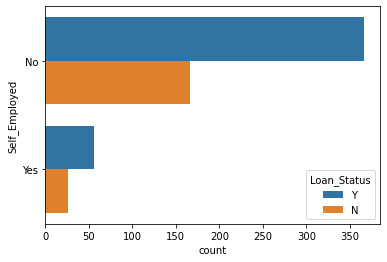

In [15]:
sns.countplot(y = 'Self_Employed', hue = 'Loan_Status', data = loan_dataset)

**Conclusion:** The number of people taking loan is more who are not self employed.

**5. Effect of credit history**

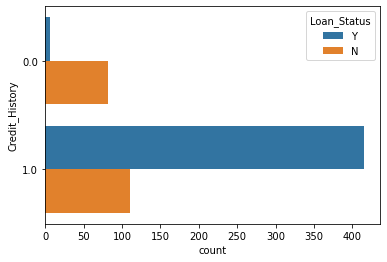

In [16]:
sns.countplot(y = 'Credit_History', hue = 'Loan_Status', data = loan_dataset)

**Conclusion:** People having good credit history tends to get loan more because they tend to pay back their loans.

**6. People of which area obtain more loan**

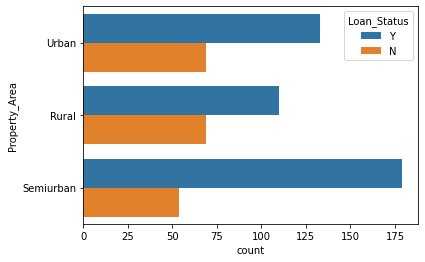

In [17]:
sns.countplot(y = 'Property_Area', hue = 'Loan_Status', data = loan_dataset)

**Conclusion:** People living in semi-urban areas obtain more loan.

**7. Target variable analysis**

In [18]:
print('Approved: %.2f' % (loan_dataset['Loan_Status'].value_counts()[0] / len(loan_dataset) * 100))
print('Not Approved: %.2f' % (loan_dataset['Loan_Status'].value_counts()[1] / len(loan_dataset) * 100))

Approved: 68.73
Not Approved: 31.27


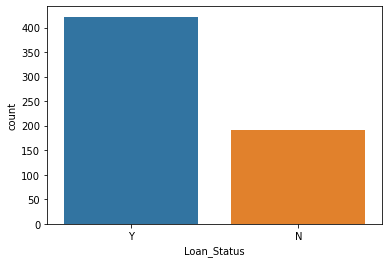

In [19]:
sns.countplot(loan_dataset['Loan_Status']);

**Conclusion:** The number of people approved for loan is more for the given dataset.

**8. Applicant income distribution and box plot**

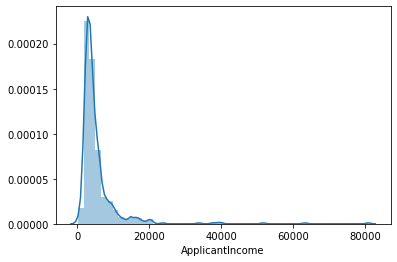

In [20]:
sns.distplot(loan_dataset['ApplicantIncome']);

**Conclusion:** The data in the distribution of applicant income is not normally distributed. The distribution is right-skewed which means there is a positive skewness.

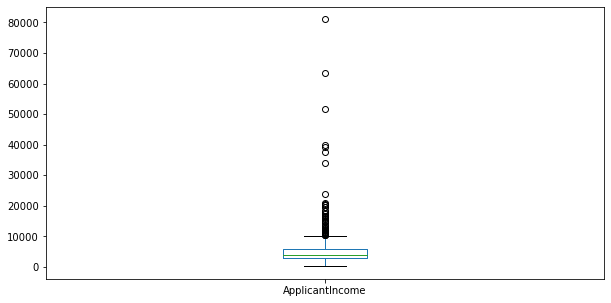

In [21]:
loan_dataset['ApplicantIncome'].plot.box(figsize=(10,5))

**Conclusion:** The boxplot shows the presence of a lot of outliers/extreme values for the applicant income feature.

**9. Coapplicant income distribution and box plot**

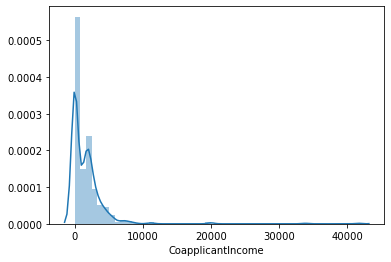

In [22]:
sns.distplot(loan_dataset['CoapplicantIncome']);

**Conclusion:** The data in the distribution of co-applicant income is not normally distributed. The distribution is right-skewed which means there is a positive skewness.

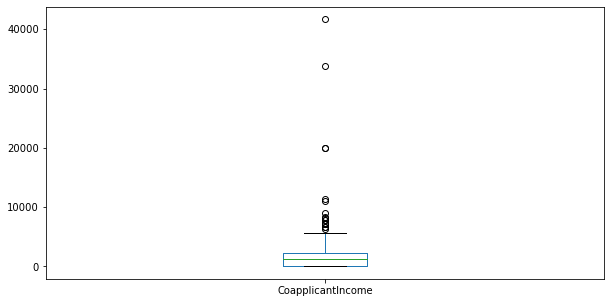

In [23]:
loan_dataset['CoapplicantIncome'].plot.box(figsize=(10,5))

**Conclusion:** The boxplot shows the presence of a lot of outliers/extreme values for the co-applicant income feature.

**10. Loan amount distribution & box plot**

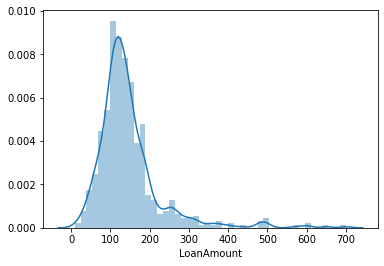

In [24]:
sns.distplot(loan_dataset['LoanAmount']);

**Conclusion:** The data is normally distributed but slightly right skewed.

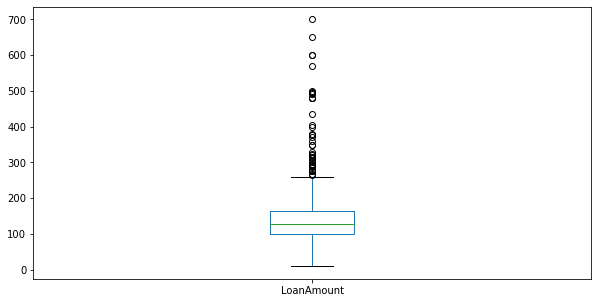

In [25]:
loan_dataset['LoanAmount'].plot.box(figsize=(10,5))

**Conclusion:** The boxplot shows the presence of a lot of outliers/extreme values for the loan amount feature.

**11. Correlation**

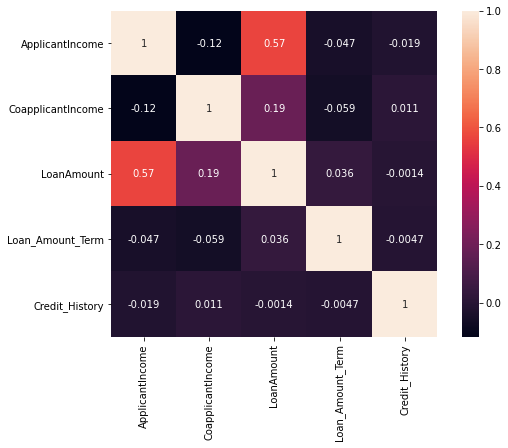

In [26]:
#Taking numerical columns
matrix = loan_dataset.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, annot=True)

**Conclusion:** The most correlated features are:

    Applicant income and Loan amount has correlation coefficient of 0.57
    Credit history and Loan status has correlation coefficient of 0.56
    Loan amount and Coapplicant income has correlation coefficient of 0.19

# Model Building

Implementation of supervised machine learning algorithm that follows **non-parametric approach**. 

In non-parametric methods, there is no need to make any assumption of parameters for the given population. The dataset set does not follow any distribution. It works on the assumption that similar input has similar output.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [71]:
#Convert some object data type to int
gender = {"Female": 0, "Male": 1}
yes_no = {'No' : 0,'Yes' : 1}
dependents = {'0':0,'1':1,'2':2,'3+':3}
education = {'Not Graduate' : 0, 'Graduate' : 1}
property = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
output = {"N": 0, "Y": 1}

loan_dataset['Gender'] = loan_dataset['Gender'].replace(gender)
loan_dataset['Married'] = loan_dataset['Married'].replace(yes_no)
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace(dependents)
loan_dataset['Education'] = loan_dataset['Education'].replace(education)
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].replace(yes_no)
loan_dataset['Property_Area'] = loan_dataset['Property_Area'].replace(property)
loan_dataset['Loan_Status'] = loan_dataset['Loan_Status'].replace(output)

loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [157]:
# Drop "Loan_Status" and assign it to target variable.
x = loan_dataset.drop('Loan_Status', 1)
y = loan_dataset.Loan_Status

In [169]:
#Splitting the dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=38, stratify = y)

**1. KNN**

In [170]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [171]:
prediction_knn = knn.predict(X_test)
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1]


In [172]:
#print('Score for the training set: {:.2f}'.format(knn.score(X_train, Y_train)*100))
#print('score for the test set: {:.2f}'.format(knn.score(X_test, Y_test)*100))
print('Accuracy of the model: {:.2f}'.format(accuracy_score(Y_test, prediction_knn)*100))

Accuracy of the model: 65.58


In [173]:
#Actual value and the predicted value
diff_knn = pd.DataFrame({'Actual value': Y_test, 'Predicted value': prediction_knn})
diff_knn

,Actual value,Predicted value
263,1,1
395,1,1
226,0,0
413,1,1
403,1,0
...,...,...
352,1,1
238,1,1
248,1,0
104,1,1


[[ 9 39]
 [14 92]]
              precision    recall  f1-score   support

           0       0.39      0.19      0.25        48
           1       0.70      0.87      0.78       106

    accuracy                           0.66       154
   macro avg       0.55      0.53      0.51       154
weighted avg       0.61      0.66      0.61       154



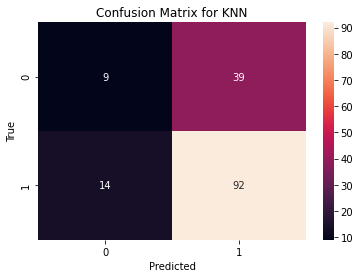

In [174]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
con_mat = confusion_matrix(Y_test, prediction_knn)
print(con_mat)

sns.heatmap(con_mat, annot=True, fmt="d")
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(Y_test, prediction_knn))

**Conclusion:** 154 records (25%) of the data was given for testing out of which 53 records were misclassified.

**2. Decision Tree**

In [175]:
dTree = tree.DecisionTreeClassifier()
dTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [176]:
prediction_dt = dTree.predict(X_test)
print("Prediction for test set: {}".format(prediction_dt))

Prediction for test set: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 1]


In [177]:
#print('Score for the training set: {:.2f}'.format(dTree.score(X_train, Y_train)*100))
#print('score for the test set: {:.2f}'.format(dTree.score(X_test, Y_test)*100))
print('Accuracy of the model: {:.2f}'.format(accuracy_score(Y_test, prediction_dt)*100))

Accuracy of the model: 66.88


In [178]:
#Actual value and the predicted value
diff_dt = pd.DataFrame({'Actual value': Y_test, 'Predicted value': prediction_dt})
diff_dt

,Actual value,Predicted value
263,1,1
395,1,1
226,0,1
413,1,1
403,1,1
...,...,...
352,1,1
238,1,1
248,1,0
104,1,1


[[16 32]
 [19 87]]
              precision    recall  f1-score   support

           0       0.46      0.33      0.39        48
           1       0.73      0.82      0.77       106

    accuracy                           0.67       154
   macro avg       0.59      0.58      0.58       154
weighted avg       0.65      0.67      0.65       154



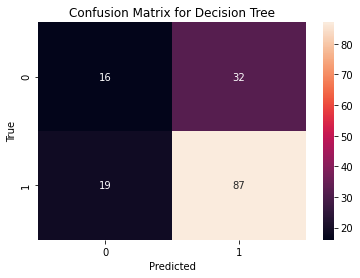

In [179]:
#Confusion matrix and classification report
con_mat = confusion_matrix(Y_test, prediction_dt)
print(con_mat)

sns.heatmap(con_mat, annot=True, fmt="d")
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(Y_test, prediction_dt))

**Conclusion:** 154 records (25%) of the data was given for testing out of which 51 records were misclassified.

# Conclusion

From the Exploratory Data Analysis we can generate insight from the data. How each of the features relates to the target.

There are many algorithms which can be used for this particular nature of the problem. Here the next step is to build a model which can be used to predict whether assigning the loan to a particular person will be safe or not based on specific features.
For this we can use supervised learning algorithms as the data is already labeled. This is a classification problem where we need to predict a class label for a given set of input data.
I have implemented supervised machine learning algorithm that follows non-parametric approach.

**1. KNN:** KNN gve the accuracy of 65.58%.

**2. Decision Tree:** Decision tree gave the accuracy of 66.88%.

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which we do not train the model. Later, we test the model on this sample before finalizing it. Some of the common methods for validation are:

    The validation set approach
    k-fold cross validation
    Leave one out cross validation (LOOCV)
    Stratified k-fold cross validation